# 스토어드 프로시저 사용 방법

## 스토어드 프로시저 기본

### 스토어드 프로시저의 개념과 형식

* 스토어드 프로시저: MySQL에서 제공하는 프로그래밍 기능
* 쿼리 문의 집합, 어떠한 동작을 일괄 처리하기 위한 용도로 사용
* 자주 사용하는 일반적인 쿼리를 반복하는 것보다는 스토어드 프로시저로 묶어놓고, 필요할 때마다 간단히 호출만 하면 편리하게 MySQL운영 가능

In [ ]:
# 스토어드 프로시저 기본 형식
# $$는 1개만 사용해도 되지만, 명확하게 표시하기 위해 2개 사용(##, %%, &&, //등으로 변경 가능)
DELIMITTER $$
CREATE PROCEDURE 스토어드_프로시저_이름(IN 또는 OUT 매개변수)
BEGIN
<코드 작성 부분>
END $$
DELIMITER ;

#### DELIMITER의 의미
* '구분자'의 의미를 가짐
* 기본적으로 세미콜론 사용, 스토어드 프로시저 안에 있는 많은 SQL의 끝에도 세미콜론 사용
* 세미콜론이 나왔을 때 이것이 SQL의 끝인지, 스토어드 프로시저의 끝인지 모호
* 구분자를 바꿔서 그 구분자가 나올 때까지는 스토어드 프로시저가 끝난 것이 아니라는 것을 표시
* 즉, 세미콜론은 SQL의 끝으로만 표시, $$는 스토어드 프로시저의 끝으로 사용, 그리고 마지막 행에서 DELIMITER를 세미콜론으로 바꿔주면 원래대로 MySQL의 구분자가 세미콜론으로 돌아옴

* 스토어드 프로시저 호출

In [ ]:
# 호출 방법
CALL 스토어드_프로시저_이름();

### 스토어드 프로시저의 생성

In [ ]:
# 스토어드 프로시저 생성
USE market_db;
DROP PROCEDURE IF EXISTS user_proc;
DELIMITER $$
CREATE PROCEDURE user_proc()
BEGIN
	SELECT * FROM member;
END $$
DELIMITER ;

CALL user_proc();

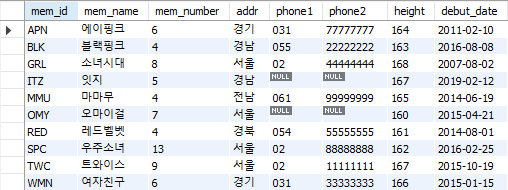

### 스토어드 프로시저 삭제

In [ ]:
# 스토어드 프로시저 삭제
DROP PROCEDURE user_proc;

## 스토어드 프로시저 실습

### 매개변수 사용

* 스토어드 프로시저에서는 실행 시 입력 매개변수를 지정할 수 있다.
* 지정 형식은 다음과 같다.

In [ ]:
# 입력 매개변수 지정 형식
IN 입력_매개변수_이름 데이터_형식

In [ ]:
# 입력 매개변수가 있는 스토어드 프로시저를 실행하기 위해서 괄호 안에 값 전달
CALL 프로시저_이름(전달 값);

In [ ]:
# 출력 매개변수 형식
OUT 출력_매개변수_이름 데이터_형식

In [ ]:
# 출력 매개변수가 있는 스토어드 프로시저를 실행
CALL 프로시저_이름(@변수명);
SELECT @변수명;

In [ ]:
# 입력 매개변수 활용
USE market_db;
DROP PROCEDURE IF EXISTS user_proc1;
DELIMITER $$
CREATE PROCEDURE user_proc1(IN userName VARCHAR(10))
BEGIN
  SELECT * FROM member WHERE mem_name = userName; 
END $$
DELIMITER ;

CALL user_proc1('에이핑크');

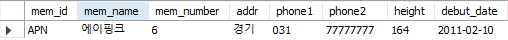

In [ ]:
# 2개의 입력 매개변수가 있는 스토어드 프로시저
DROP PROCEDURE IF EXISTS user_proc2;
DELIMITER $$
CREATE PROCEDURE user_proc2(
    IN userNumber INT, 
    IN userHeight INT  )
BEGIN
  SELECT * FROM member 
    WHERE mem_number > userNumber AND height > userHeight;
END $$
DELIMITER ;

CALL user_proc2(6, 165);

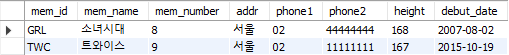

In [ ]:
# 출력 매개변수 활용
DROP PROCEDURE IF EXISTS user_proc3;
DELIMITER $$
CREATE PROCEDURE user_proc3(
    IN txtValue CHAR(10),
    OUT outValue INT     )
BEGIN
  INSERT INTO noTable VALUES(NULL,txtValue);
  SELECT MAX(id) INTO outValue FROM noTable; 
END $$
DELIMITER ;

In [ ]:
# noTable이 없다는 오류 발생
DESC noTable;

* 이상한 점은 앞에서 user_proc3은 오류없이 잘 만들어졌다는 점이다.
* 스토어드 프로시저를 만드는 시점에는 아직 존재하지 않는 테이블을 사용해도 되나, CALL로 실행하는 시점에는 사용한 테이블이 있어야 한다.

* noTable을 만들어보자.

In [ ]:
# noTable 생성
CREATE TABLE IF NOT EXISTS noTable(
id INT AUTO_INCREMENT PRIMARY KEY,
txt CHAR(10)
);

In [ ]:
# 스토어드 프로시저 호출
# 출력 매개변수 위치에 @변수명 형태로 변수를 전달 -> 그 변수에 결과가 저장됨
CALL user_proc3 ('테스트1', @myValue);
SELECT CONCAT('입력된 ID 값 ==>', @myValue);

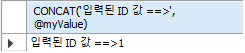

### SQL 프로그래밍 활용

* IF ~ ELSE문 사용
* 가수 그룹의 데뷔 연도가 2015년 이전이며 '고참 가수', 2015년 이후(2015년 포함)이면 '신인 가수'를 출력하는 스토어드 프로시저 작성

In [ ]:
# IF ~ ELSE 문을 활용한 프로그래밍
DROP PROCEDURE IF EXISTS ifelse_proc;
DELIMITER $$
CREATE PROCEDURE ifelse_proc(
	IN memName VARCHAR(10)
)
BEGIN
	DECLARE debutYear INT;  -- 변수선언
    SELECT YEAR(debut_date) into debutYear FROM member
		WHERE mem_name = memName;
	IF (debutYear >= 2015) THEN
		SELECT '신인 가수네요. 화이팅 하세요.' AS '메시지';
	ELSE
		SELECT '고참 가수네요. 그동안 수고하셨어요.' AS '메시지';
	END IF;
END $$
DELIMITER ;

CALL ifelse_proc('오마이걸');


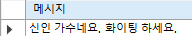

In [ ]:
# 날짜와 관련된 MySQL 함수
SELECT YEAR(CURDATE()), MONTH(CURDATE()), DAY(CURDATE());

In [ ]:
# while문 활용한 스토어드 프로시저
DROP PROCEDURE IF EXISTS while_proc;
DELIMITER $$
CREATE PROCEDURE while_proc()
BEGIN
	DECLARE hap INT;
    DECLARE num INT;
    SET hap = 0;
    SET num = 1;
    
    WHILE (num <= 100) DO -- 100까지 반복
		SET hap = hap + num;
        SET num = num + 1; -- 숫자증가
	END WHILE;
    SELECT hap AS '1~100 합계';
END $$
DELIMITER ;

CALL while_proc();

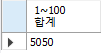

In [ ]:
# 동적 SQL 활용
DROP PROCEDURE IF EXISTS dynamic_proc;
DELIMITER $$
CREATE PROCEDURE dynamic_proc(
	IN tableName VARCHAR(20)
)
BEGIN
	SET @sqlQuery = CONCAT('SELECT * FROM ', tableName);
    PREPARE myQuery FROM @sqlQuery;
    EXECUTE myQuery;
    DEALLOCATE PREPARE myQuery;
END $$
DELIMITER ;

CALL dynamic_proc ('member');

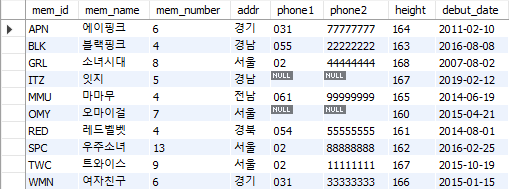